# **Preparing Dataset**

## **Load Dataset**

In [ ]:
from google.colab import drive
import zipfile
import os

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Path ke file ZIP di Google Drive
zip_path = '/content/drive/MyDrive/capstone_botaniscan/corn_color.zip'

Mounted at /content/drive


In [ ]:
# Extract zip file
! unzip "/content/drive/MyDrive/capstone_botaniscan/corn_color.zip" -d .

## **Classes**

In [ ]:
corn_data = "/content/corn_color"
corn_classes = os.listdir(corn_data)

In [ ]:
print("Corn Classes:")
for classes in corn_classes:
    if os.path.isdir(os.path.join(corn_data, classes)):
        print(classes)

Corn Classes:
Corn_Common_Rust
Not_Corn
Corn_Healthy
Corn_Northern_Leaf_Blight
Corn_Cercospora_Leaf_Spot_Gray_Leaf_Spot


## **Preview Image Dataset**

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


Corn_Common_Rust
Total Images: 1000
Resolution of First Image: (256, 256, 3)


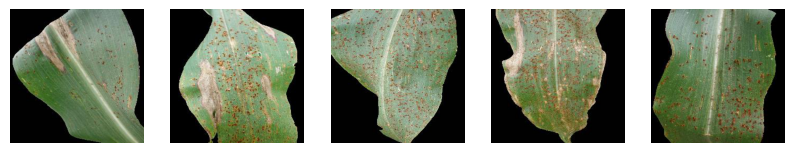


Not_Corn
Total Images: 1000
Resolution of First Image: (256, 382, 3)


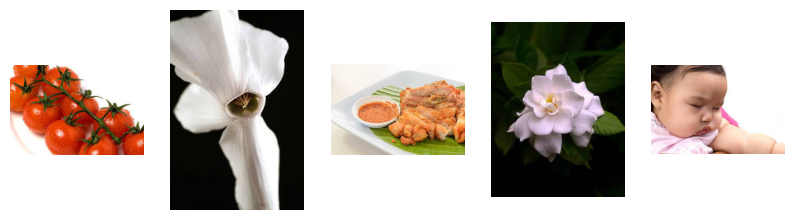


Corn_Healthy
Total Images: 1000
Resolution of First Image: (256, 256, 3)


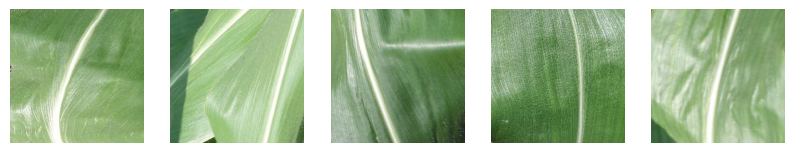


Corn_Northern_Leaf_Blight
Total Images: 985
Resolution of First Image: (256, 256, 3)


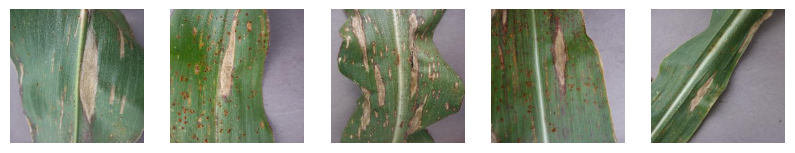


Corn_Cercospora_Leaf_Spot_Gray_Leaf_Spot
Total Images: 513
Resolution of First Image: (256, 256, 3)


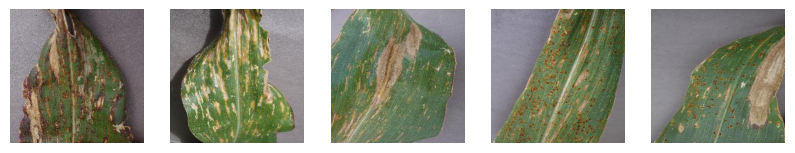

In [ ]:
for item in corn_classes:
  print("")
  print(item)
  class_dir = os.path.join(corn_data, item)
  class_images = os.listdir(class_dir)
  
  # Total images in each classes
  num_images = len(class_images)
  print("Total Images:", num_images)
  
  # Resolution/size of each first image in class
  img_path = os.path.join(class_dir, class_images[0])
  img = mpimg.imread(img_path)
  image_shape = img.shape
  print("Resolution of First Image:", image_shape)
  
  # Showing some images
  plt.figure(figsize=(10, 5))
  for i, img_path in enumerate(class_images[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(class_dir, img_path))
    plt.axis('off')
    plt.imshow(img)
  plt.show()

## **Preprocessing Dataset**

In [ ]:
import cv2

not_corn_dir = os.path.join(corn_data, "Not_Corn")
not_corn_images = os.listdir(not_corn_dir)

for img_path in not_corn_images:
    img = cv2.imread(os.path.join(not_corn_dir, img_path))
    resized_img = cv2.resize(img, (256, 256))
    cv2.imwrite(os.path.join(not_corn_dir, img_path), resized_img)

Not_Corn
Jumlah gambar: 1000
Resolusi/Ukuran gambar pertama: (256, 256, 3)


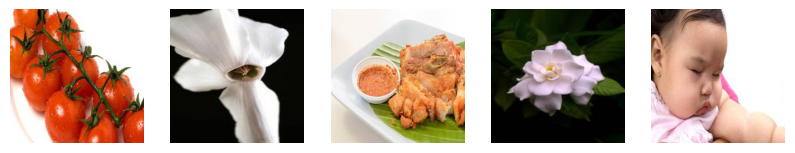

In [ ]:
not_tomato_dir = os.path.join(corn_data, "Not_Corn")
not_tomato_images = os.listdir(not_tomato_dir)

print("Not_Corn")
num_images = len(not_corn_images)
print("Jumlah gambar:", num_images)

# Menampilkan resolusi/ukuran gambar pertama dalam kelas
img_path = os.path.join(not_corn_dir, not_corn_images[0])
img = mpimg.imread(img_path)
image_shape = img.shape
print("Resolusi/Ukuran gambar pertama:", image_shape)

# Menampilkan beberapa contoh gambar
plt.figure(figsize=(10, 5))
for i, img_path in enumerate(not_corn_images[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(not_corn_dir, img_path))
    plt.axis('off')
    plt.imshow(img)
plt.show()


In [ ]:
import shutil

output_dir = "/content/corn_color/Not_Corn_Clean"
os.makedirs(output_dir, exist_ok=True)

not_corn_dir = os.path.join(corn_data, "Not_Corn")
not_tomato_images = os.listdir(not_corn_dir)

for img_path in not_corn_images:
    img = cv2.imread(os.path.join(not_corn_dir, img_path))
    resized_img = cv2.resize(img, (256, 256))
    output_path = os.path.join(output_dir, img_path)
    cv2.imwrite(output_path, resized_img)

In [ ]:
# Menghapus folder
# import shutil
# folder_path = "/content/corn_color/not_corn_clean"
# Menghapus folder beserta isinya
# shutil.rmtree(folder_path)

In [ ]:
corn_data_new = "/content/corn_color"
corn_classes = os.listdir(corn_data_new)

# Mengecualikan folder "not_tomato" dari tomato_classes
if "Not_Corn" in corn_classes:
    corn_classes.remove("Not_Corn")

print("Corn Classes:")
for corn_class in corn_classes:
    if os.path.isdir(os.path.join(corn_data_new, corn_class)):
        print(corn_class)

Corn Classes:
Corn_Common_Rust
Not_Corn_Clean
Corn_Healthy
Corn_Northern_Leaf_Blight
Corn_Cercospora_Leaf_Spot_Gray_Leaf_Spot


## **Rename Each Images as Folder Names**

In [ ]:
import os

for corn_class in corn_classes:
    class_dir = os.path.join(corn_data_new, corn_class)
    if os.path.isdir(class_dir):
        file_list = os.listdir(class_dir)
        for i, file_name in enumerate(file_list):
            file_path = os.path.join(class_dir, file_name)
            new_file_name = f"{corn_class}_{i+1}.jpg"
            new_file_path = os.path.join(class_dir, new_file_name)
            os.rename(file_path, new_file_path)

## **Save Final Dataset**

In [ ]:
import zipfile

# Nama direktori yang akan di-zip
source_dir = "/content/corn_color"

# Nama file zip yang akan dibuat
zip_file_name = "corn_data_final.zip"

# Buat objek zip baru
zip_file = zipfile.ZipFile(zip_file_name, 'w', zipfile.ZIP_DEFLATED)

# Rekursif menambahkan file ke dalam zip
for folder_name, subfolders, filenames in os.walk(source_dir):
    if os.path.basename(folder_name) != "Not_Corn":
        for filename in filenames:
            file_path = os.path.join(folder_name, filename)
            # Tambahkan file ke dalam zip dengan struktur direktori yang sama
            zip_file.write(file_path, os.path.relpath(file_path, source_dir))

# Tutup zip file setelah selesai
zip_file.close()

print("Dataset succesfully zipped to:", zip_file_name)

Dataset succesfully zipped to: corn_data_final.zip


# **Building Detection Model**

## **Importing New Dataset**

In [ ]:
from google.colab import drive
import zipfile
import os
from keras.preprocessing.image import ImageDataGenerator

# Mount Google Drive
drive.mount('/content/drive')

# Extract zip file
! unzip "/content/drive/MyDrive/capstone_botaniscan/corn_data_final.zip" -d .


zip_file_path = '/content/drive/MyDrive/capstone_botaniscan/corn_data_final.zip'  # Path ke file zip
target_folder = '/content/finaldata'  # Path ke folder tujuan

# Extract file zip ke folder tujuan
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(target_folder)

In [31]:
finaldata_dir = "/content/finaldata"
img_dim = 256
img_shape = (256, 256, 3)

# Augmentasi Data
datagen = ImageDataGenerator(
    rescale=1./256.,
    validation_split=0.15,
    rotation_range=20,  # Rotasi gambar hingga 20 derajat
    width_shift_range=0.2,  # Pergeseran horizontal gambar sebesar 0.2
    height_shift_range=0.2,  # Pergeseran vertikal gambar sebesar 0.2
    shear_range=0.2,  # Peregangan gambar sebesar 0.2
    zoom_range=0.2,  # Perbesaran gambar sebesar 0.2
    horizontal_flip=True,  # Pembalikan horizontal gambar
    vertical_flip=True  # Pembalikan vertikal gambar
)

train_generator = datagen.flow_from_directory(
    finaldata_dir,
    target_size=(img_dim, img_dim),
    batch_size=100,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    finaldata_dir,
    target_size=(img_dim, img_dim),
    batch_size=100,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 3825 images belonging to 5 classes.
Found 673 images belonging to 5 classes.


In [32]:
train_generator.class_indices

{'Corn_Cercospora_Leaf_Spot_Gray_Leaf_Spot': 0,
 'Corn_Common_Rust': 1,
 'Corn_Healthy': 2,
 'Corn_Northern_Leaf_Blight': 3,
 'Not_Corn_Clean': 4}

In [33]:
labels = ['Corn_Cercospora_Leaf_Spot_Gray_Leaf_Spot', 'Corn_Common_Rust', 'Corn_Healthy', 'Corn_Northern_Leaf_Blight', 'Not_Corn_Clean']

name_classes = labels
num_labels = len(labels)

print("Labels: {}".format(name_classes))
print("Num labels: {}".format(num_labels))

Labels: ['Corn_Cercospora_Leaf_Spot_Gray_Leaf_Spot', 'Corn_Common_Rust', 'Corn_Healthy', 'Corn_Northern_Leaf_Blight', 'Not_Corn_Clean']
Num labels: 5


## **Building Basic Model**

In [30]:
!pip install keras_preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.regularizers import l2

# Model Definition
my_model = tf.keras.models.Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256, 3), kernel_initializer='he_uniform'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dropout(0.2),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(5, activation='softmax')
])

my_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 64)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 128)     73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 128)       147584    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 128)     

In [35]:
# Compile Model
optimizer = SGD(learning_rate=0.001, momentum=0.9)
my_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Define Callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)

# Train Model
history = my_model.fit(
    train_generator,
    epochs=5,
    steps_per_epoch=len(train_generator),
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[early_stopping, model_checkpoint]
)

# Evaluate Model
test_loss, test_accuracy = my_model.evaluate(validation_generator, steps=len(validation_generator))
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/5
39/39 [==============================] - 1790s 45s/step - loss: 1.9907 - accuracy: 0.4661 - val_loss: 1.5906 - val_accuracy: 0.6568
Epoch 2/5
39/39 [==============================] - 1708s 44s/step - loss: 1.5072 - accuracy: 0.6769 - val_loss: 1.3316 - val_accuracy: 0.7563
Epoch 3/5
39/39 [==============================] - 1782s 46s/step - loss: 1.3138 - accuracy: 0.7441 - val_loss: 1.2473 - val_accuracy: 0.7801
Epoch 4/5
39/39 [==============================] - 1773s 45s/step - loss: 1.2619 - accuracy: 0.7663 - val_loss: 1.1689 - val_accuracy: 0.8262
Epoch 5/5
7/7 [==============================] - 101s 14s/step - loss: 1.1722 - accuracy: 0.8009
Test Loss: 1.1722139120101929
Test Accuracy: 0.8008915185928345


**Plot Akurasi**

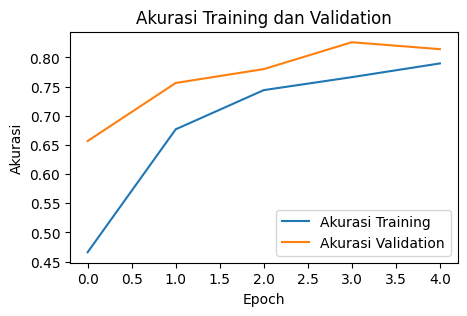

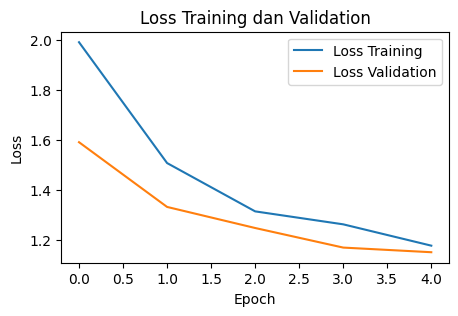

In [36]:
import matplotlib.pyplot as plt

# Plot Akurasi
plt.figure(figsize=(5, 3))
plt.plot(history.history['accuracy'], label='Akurasi Training')
plt.plot(history.history['val_accuracy'], label='Akurasi Validation')
plt.title('Akurasi Training dan Validation')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()
plt.show()

# Plot Loss
plt.figure(figsize=(5, 3))
plt.plot(history.history['loss'], label='Loss Training')
plt.plot(history.history['val_loss'], label='Loss Validation')
plt.title('Loss Training dan Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## **Testing Making Prediction**

Saving Corn_Northern_Leaf_Blight_1.jpg to Corn_Northern_Leaf_Blight_1 (1).jpg
1/1 [==============================] - 0s 220ms/step


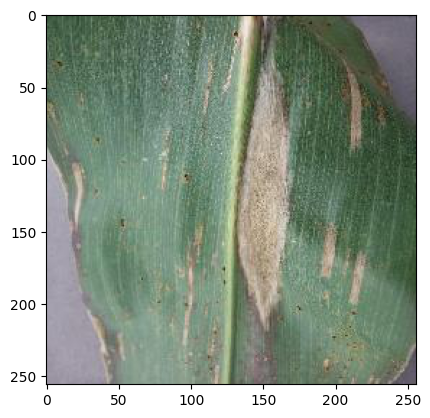

Corn_Common_Rust: 86.02%


In [41]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from tensorflow.keras.applications.xception import preprocess_input

labels = list(train_generator.class_indices.keys())

upload = files.upload()

for fn in upload.keys():
    # Prediksi gambar
    path = fn
    img = image.load_img(path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    images = np.vstack([x])
    predictions = my_model.predict(images)[0]
    
    plt.imshow(img)
    plt.show()
    
    # Menemukan kelas dengan persentase tertinggi
    max_index = np.argmax(predictions)
    max_label = labels[max_index]
    max_percentage = predictions[max_index] * 100
    
    print("{}: {:.2f}%".format(max_label, max_percentage))

Saving logo unimed.png to logo unimed.png
1/1 [==============================] - 0s 123ms/step


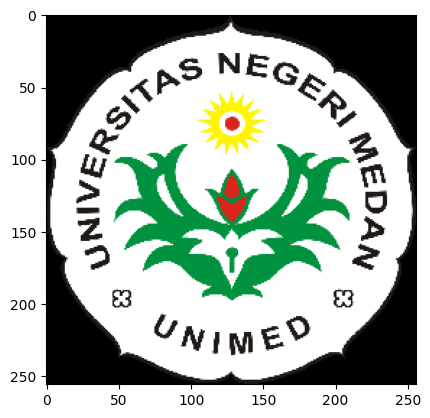

Not_Corn_Clean: 100.00%


In [47]:
labels = list(train_generator.class_indices.keys())

upload = files.upload()

for fn in upload.keys():
    # Prediksi gambar
    path = fn
    img = image.load_img(path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    images = np.vstack([x])
    predictions = my_model.predict(images)[0]
    
    plt.imshow(img)
    plt.show()
    
    # Menemukan kelas dengan persentase tertinggi
    max_index = np.argmax(predictions)
    max_label = labels[max_index]
    max_percentage = predictions[max_index] * 100
    
    print("{}: {:.2f}%".format(max_label, max_percentage))

# **Saving Model**

In [43]:
# Menyimpan model akhir
my_model.save("corn_model_2.h5")
tf.keras.models.save_model(my_model, 'corn_model_2.hdf5')

In [ ]:
#Convert TF Lite
import tensorflow as tf

#Load model yang telah disimpan
last_model = tf.keras.models.load_model(filepath="corn_model_2.h5")

#Convert model ke bentuk TF Lite
converter = tf.lite.TFLiteConverter.from_keras_model(last_model)
model_tflite = converter.convert()

#Simpan TF Lite model.
with tf.io.gfile.GFile('corn_model_2.tflite', 'wb') as f:
  f.write(model_tflite)

In [ ]:
# Menyimpan dalam bentuk JSON
model_json = model.to_json()
with open("model_tl_json", "w") as file_json:
    file_json.write(model_json)